# PCA for 6 and 10 components

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
df_10_10inst = pd.read_csv('C:/PSL_KNN/data_10_frames_10_instances.csv')

df_10_10inst

,videoname,axis,n_frame,n_landmark,coordinate
0,aprender_175,x,0,0,0.495806
1,aprender_175,x,0,1,0.523832
2,aprender_175,x,0,2,0.543781
3,aprender_175,x,0,3,0.561008
4,aprender_175,x,0,4,0.480482
...,...,...,...,...,...
59795,yo_3,y,12,18,0.697350
59796,yo_3,y,12,19,0.577754
59797,yo_3,y,12,20,0.663825
59798,yo_3,y,12,21,0.577081


In [ ]:
df_10_10inst['classes'] = df_10_10inst['videoname'].apply(lambda x: x.split('_')[0])
x_10_10inst = df_10_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_10_10inst['videoname']))

In [561]:
temp_10_10inst = pd.DataFrame(x_10_10inst['coordinate'].tolist())
temp_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,450,451,452,453,454,455,456,457,458,459
0,0.495806,0.523832,0.543781,0.561008,0.480482,0.470032,0.456728,0.594658,0.453686,0.529510,...,0.500838,0.711247,0.265011,0.616345,0.206288,0.619600,0.193010,0.575766,0.216091,0.569957
1,0.514383,0.548351,0.566327,0.582206,0.492199,0.473182,0.458070,0.605817,0.432215,0.548546,...,0.835745,0.593835,0.717371,0.273257,0.725650,0.203608,0.691391,0.187500,0.682232,0.215004
2,0.497058,0.520504,0.534275,0.545982,0.475575,0.459812,0.444983,0.569902,0.425907,0.531288,...,0.545798,0.660586,0.365322,0.592418,0.316429,0.612745,0.295847,0.586953,0.318972,0.577937
3,0.534864,0.561178,0.575552,0.589922,0.518197,0.505109,0.491974,0.622407,0.479705,0.565821,...,0.656457,0.623457,0.452110,0.448878,0.396107,0.399155,0.361584,0.365836,0.379465,0.378608
4,0.503314,0.525787,0.540517,0.552647,0.479308,0.461066,0.442991,0.578205,0.415670,0.533213,...,0.823187,0.585232,0.670107,0.265102,0.663198,0.206352,0.617142,0.187647,0.620610,0.215813


In [562]:
temp_10_10inst.insert(0,"instance",['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27'
,'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466'
,'bien_174','bien_230','bien_241','bien_288','bien_295','bien_337'
,'bien_39','bien_416','bien_561','bien_626','comer_144','comer_164'
,'comer_248','comer_313','comer_412','comer_422','comer_475','comer_625'
,'comer_712','comer_747','cuánto_405','cuánto_420','cuánto_445'
,'cuánto_448','cuánto_456','cuánto_460','cuánto_468','cuánto_483'
,'cuánto_703','cuánto_742','cómo_12','cómo_171','cómo_223','cómo_230'
,'cómo_379','cómo_427','cómo_44','cómo_85','cómo_9','cómo_90','dentro_241'
,'dentro_369','dentro_457','dentro_532','dentro_55','dentro_627'
,'dentro_647','dentro_664','dentro_692','dentro_73','emoción_143'
,'emoción_145','emoción_188','emoción_249','emoción_250','emoción_286'
,'emoción_43','emoción_54','emoción_71','emoción_93','fuerte_153'
,'fuerte_310','fuerte_314','fuerte_361','fuerte_362','fuerte_363'
,'fuerte_372','fuerte_459','fuerte_571','fuerte_588','pensar_235'
,'pensar_450','pensar_461','pensar_600','pensar_613','pensar_623'
,'pensar_640','pensar_66','pensar_771','pensar_97','sentir_14'
,'sentir_149','sentir_16','sentir_38','sentir_458','sentir_53'
,'sentir_547','sentir_602','sentir_604','sentir_89','sí_159','sí_194'
,'sí_200','sí_278','sí_291','sí_306','sí_359','sí_419','sí_633','sí_659'
,'tú_205','tú_207','tú_229','tú_247','tú_277','tú_635','tú_691','tú_80'
,'tú_803','tú_96','yo_113','yo_119','yo_121','yo_125','yo_140','yo_152'
,'yo_164','yo_235','yo_237','yo_3'],True)


temp_10_10inst['classes'] = temp_10_10inst['instance'].apply(lambda x: x.split('_')[0])

temp_10_10inst.head()

,instance,0,1,2,3,4,5,6,7,8,...,451,452,453,454,455,456,457,458,459,classes
0,aprender_175,0.495806,0.523832,0.543781,0.561008,0.480482,0.470032,0.456728,0.594658,0.453686,...,0.711247,0.265011,0.616345,0.206288,0.619600,0.193010,0.575766,0.216091,0.569957,aprender
1,aprender_18,0.514383,0.548351,0.566327,0.582206,0.492199,0.473182,0.458070,0.605817,0.432215,...,0.593835,0.717371,0.273257,0.725650,0.203608,0.691391,0.187500,0.682232,0.215004,aprender
2,aprender_195,0.497058,0.520504,0.534275,0.545982,0.475575,0.459812,0.444983,0.569902,0.425907,...,0.660586,0.365322,0.592418,0.316429,0.612745,0.295847,0.586953,0.318972,0.577937,aprender
3,aprender_217,0.534864,0.561178,0.575552,0.589922,0.518197,0.505109,0.491974,0.622407,0.479705,...,0.623457,0.452110,0.448878,0.396107,0.399155,0.361584,0.365836,0.379465,0.378608,aprender
4,aprender_27,0.503314,0.525787,0.540517,0.552647,0.479308,0.461066,0.442991,0.578205,0.415670,...,0.585232,0.670107,0.265102,0.663198,0.206352,0.617142,0.187647,0.620610,0.215813,aprender


In [563]:
alldataset_dataset_10_10inst = temp_10_10inst.iloc[:,1:462]  #461 columnas
new_alldataset_dataset_10_10inst = temp_10_10inst.iloc[:,1:461]  #460 columnas
new_alldataset_dataset_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,450,451,452,453,454,455,456,457,458,459
0,0.495806,0.523832,0.543781,0.561008,0.480482,0.470032,0.456728,0.594658,0.453686,0.529510,...,0.500838,0.711247,0.265011,0.616345,0.206288,0.619600,0.193010,0.575766,0.216091,0.569957
1,0.514383,0.548351,0.566327,0.582206,0.492199,0.473182,0.458070,0.605817,0.432215,0.548546,...,0.835745,0.593835,0.717371,0.273257,0.725650,0.203608,0.691391,0.187500,0.682232,0.215004
2,0.497058,0.520504,0.534275,0.545982,0.475575,0.459812,0.444983,0.569902,0.425907,0.531288,...,0.545798,0.660586,0.365322,0.592418,0.316429,0.612745,0.295847,0.586953,0.318972,0.577937
3,0.534864,0.561178,0.575552,0.589922,0.518197,0.505109,0.491974,0.622407,0.479705,0.565821,...,0.656457,0.623457,0.452110,0.448878,0.396107,0.399155,0.361584,0.365836,0.379465,0.378608
4,0.503314,0.525787,0.540517,0.552647,0.479308,0.461066,0.442991,0.578205,0.415670,0.533213,...,0.823187,0.585232,0.670107,0.265102,0.663198,0.206352,0.617142,0.187647,0.620610,0.215813


In [564]:
alldataset_dataset_10_10inst = alldataset_dataset_10_10inst.T.iloc[:460,:]
alldataset_dataset_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0.495806,0.514383,0.497058,0.534864,0.503314,0.509485,0.507151,0.469856,0.516629,0.496013,...,0.491842,0.492883,0.486383,0.464337,0.455288,0.573642,0.488541,0.439165,0.529019,0.493293
1,0.523832,0.548351,0.520504,0.561178,0.525787,0.528646,0.533556,0.49226,0.533556,0.525905,...,0.511996,0.508674,0.513785,0.493587,0.47414,0.59078,0.511526,0.464585,0.552916,0.510662
2,0.543781,0.566327,0.534275,0.575552,0.540517,0.544299,0.546433,0.508573,0.54548,0.539205,...,0.527276,0.520923,0.528099,0.511841,0.490853,0.599315,0.528798,0.481023,0.568337,0.525759
3,0.561008,0.582206,0.545982,0.589922,0.552647,0.560631,0.562941,0.525647,0.558149,0.555482,...,0.541398,0.532626,0.545512,0.529421,0.503078,0.607354,0.545086,0.494094,0.585308,0.539981
4,0.480482,0.492199,0.475575,0.518197,0.479308,0.484755,0.480936,0.448011,0.498532,0.469797,...,0.467975,0.466464,0.466763,0.446601,0.426133,0.554405,0.468813,0.417041,0.513109,0.466384


In [565]:
alldataset_dataset_10_10inst.columns = ['aprender_175', 'aprender_18', 'aprender_195', 'aprender_217',
       'aprender_27', 'aprender_282', 'aprender_34', 'aprender_35',
       'aprender_7', 'aprender__466', 'bien_174', 'bien_230', 'bien_241',
       'bien_288', 'bien_295', 'bien_337', 'bien_39', 'bien_416',
       'bien_561', 'bien_626', 'comer_144', 'comer_164', 'comer_248',
       'comer_313', 'comer_412', 'comer_422', 'comer_475', 'comer_625',
       'comer_712', 'comer_747', 'cuánto_405', 'cuánto_420', 'cuánto_445',
       'cuánto_448', 'cuánto_456', 'cuánto_460', 'cuánto_468',
       'cuánto_483', 'cuánto_703', 'cuánto_742', 'cómo_12', 'cómo_171',
       'cómo_223', 'cómo_230', 'cómo_379', 'cómo_427', 'cómo_44',
       'cómo_85', 'cómo_9', 'cómo_90', 'dentro_241', 'dentro_369',
       'dentro_457', 'dentro_532', 'dentro_55', 'dentro_627',
       'dentro_647', 'dentro_664', 'dentro_692', 'dentro_73',
       'emoción_143', 'emoción_145', 'emoción_188', 'emoción_249',
       'emoción_250', 'emoción_286', 'emoción_43', 'emoción_54',
       'emoción_71', 'emoción_93', 'fuerte_153', 'fuerte_310',
       'fuerte_314', 'fuerte_361', 'fuerte_362', 'fuerte_363',
       'fuerte_372', 'fuerte_459', 'fuerte_571', 'fuerte_588',
       'pensar_235', 'pensar_450', 'pensar_461', 'pensar_600',
       'pensar_613', 'pensar_623', 'pensar_640', 'pensar_66',
       'pensar_771', 'pensar_97', 'sentir_14', 'sentir_149', 'sentir_16',
       'sentir_38', 'sentir_458', 'sentir_53', 'sentir_547', 'sentir_602',
       'sentir_604', 'sentir_89', 'sí_159', 'sí_194', 'sí_200', 'sí_278',
       'sí_291', 'sí_306', 'sí_359', 'sí_419', 'sí_633', 'sí_659',
       'tú_205', 'tú_207', 'tú_229', 'tú_247', 'tú_277', 'tú_635',
       'tú_691', 'tú_80', 'tú_803', 'tú_96', 'yo_113', 'yo_119', 'yo_121',
       'yo_125', 'yo_140', 'yo_152', 'yo_164', 'yo_235', 'yo_237', 'yo_3']

In [566]:
alldataset_dataset_10_10inst_features = ['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14','feature_15','feature_16','feature_17','feature_18','feature_19','feature_20','feature_21','feature_22','feature_23','feature_24','feature_25','feature_26','feature_27','feature_28','feature_29','feature_30','feature_31','feature_32','feature_33','feature_34','feature_35','feature_36','feature_37','feature_38','feature_39','feature_40','feature_41','feature_42','feature_43','feature_44','feature_45','feature_46','feature_47','feature_48','feature_49','feature_50','feature_51','feature_52','feature_53','feature_54','feature_55','feature_56','feature_57','feature_58','feature_59','feature_60','feature_61','feature_62','feature_63','feature_64','feature_65','feature_66','feature_67','feature_68','feature_69','feature_70','feature_71','feature_72','feature_73','feature_74','feature_75','feature_76','feature_77','feature_78','feature_79','feature_80','feature_81','feature_82','feature_83','feature_84','feature_85','feature_86','feature_87','feature_88','feature_89','feature_90','feature_91','feature_92','feature_93','feature_94','feature_95','feature_96','feature_97','feature_98','feature_99','feature_100','feature_101','feature_102','feature_103','feature_104','feature_105','feature_106','feature_107','feature_108','feature_109','feature_110','feature_111','feature_112','feature_113','feature_114','feature_115','feature_116','feature_117','feature_118','feature_119','feature_120','feature_121','feature_122','feature_123','feature_124','feature_125','feature_126','feature_127','feature_128','feature_129','feature_130','feature_131','feature_132','feature_133','feature_134','feature_135','feature_136','feature_137','feature_138','feature_139','feature_140','feature_141','feature_142','feature_143','feature_144','feature_145','feature_146','feature_147','feature_148','feature_149','feature_150','feature_151','feature_152','feature_153','feature_154','feature_155','feature_156','feature_157','feature_158','feature_159','feature_160','feature_161','feature_162','feature_163','feature_164','feature_165','feature_166','feature_167','feature_168','feature_169','feature_170','feature_171','feature_172','feature_173','feature_174','feature_175','feature_176','feature_177','feature_178','feature_179','feature_180','feature_181','feature_182','feature_183','feature_184','feature_185','feature_186','feature_187','feature_188','feature_189','feature_190','feature_191','feature_192','feature_193','feature_194','feature_195','feature_196','feature_197','feature_198','feature_199','feature_200','feature_201','feature_202','feature_203','feature_204','feature_205','feature_206','feature_207','feature_208','feature_209','feature_210','feature_211','feature_212','feature_213','feature_214','feature_215','feature_216','feature_217','feature_218','feature_219','feature_220','feature_221','feature_222','feature_223','feature_224','feature_225','feature_226','feature_227','feature_228','feature_229','feature_230','feature_231','feature_232','feature_233','feature_234','feature_235','feature_236','feature_237','feature_238','feature_239','feature_240','feature_241','feature_242','feature_243','feature_244','feature_245','feature_246','feature_247','feature_248','feature_249','feature_250','feature_251','feature_252','feature_253','feature_254','feature_255','feature_256','feature_257','feature_258','feature_259','feature_260','feature_261','feature_262','feature_263','feature_264','feature_265','feature_266','feature_267','feature_268','feature_269','feature_270','feature_271','feature_272','feature_273','feature_274','feature_275','feature_276','feature_277','feature_278','feature_279','feature_280','feature_281','feature_282','feature_283','feature_284','feature_285','feature_286','feature_287','feature_288','feature_289','feature_290','feature_291','feature_292','feature_293','feature_294','feature_295','feature_296','feature_297','feature_298','feature_299','feature_300','feature_301','feature_302','feature_303','feature_304','feature_305','feature_306','feature_307','feature_308','feature_309','feature_310','feature_311','feature_312','feature_313','feature_314','feature_315','feature_316','feature_317','feature_318','feature_319','feature_320','feature_321','feature_322','feature_323','feature_324','feature_325','feature_326','feature_327','feature_328','feature_329','feature_330','feature_331','feature_332','feature_333','feature_334','feature_335','feature_336','feature_337','feature_338','feature_339','feature_340','feature_341','feature_342','feature_343','feature_344','feature_345','feature_346','feature_347','feature_348','feature_349','feature_350','feature_351','feature_352','feature_353','feature_354','feature_355','feature_356','feature_357','feature_358','feature_359','feature_360','feature_361','feature_362','feature_363','feature_364','feature_365','feature_366','feature_367','feature_368','feature_369','feature_370','feature_371','feature_372','feature_373','feature_374','feature_375','feature_376','feature_377','feature_378','feature_379','feature_380','feature_381','feature_382','feature_383','feature_384','feature_385','feature_386','feature_387','feature_388','feature_389','feature_390','feature_391','feature_392','feature_393','feature_394','feature_395','feature_396','feature_397','feature_398','feature_399','feature_400','feature_401','feature_402','feature_403','feature_404','feature_405','feature_406','feature_407','feature_408','feature_409','feature_410','feature_411','feature_412','feature_413','feature_414','feature_415','feature_416','feature_417','feature_418','feature_419','feature_420','feature_421','feature_422','feature_423','feature_424','feature_425','feature_426','feature_427','feature_428','feature_429','feature_430','feature_431','feature_432','feature_433','feature_434','feature_435','feature_436','feature_437','feature_438','feature_439','feature_440','feature_441','feature_442','feature_443','feature_444','feature_445','feature_446','feature_447','feature_448','feature_449','feature_450','feature_451','feature_452','feature_453','feature_454','feature_455','feature_456','feature_457','feature_458', 'feature_459']

In [567]:
alldataset_dataset_10_10inst.head()

,aprender_175,aprender_18,aprender_195,aprender_217,aprender_27,aprender_282,aprender_34,aprender_35,aprender_7,aprender__466,...,yo_113,yo_119,yo_121,yo_125,yo_140,yo_152,yo_164,yo_235,yo_237,yo_3
0,0.495806,0.514383,0.497058,0.534864,0.503314,0.509485,0.507151,0.469856,0.516629,0.496013,...,0.491842,0.492883,0.486383,0.464337,0.455288,0.573642,0.488541,0.439165,0.529019,0.493293
1,0.523832,0.548351,0.520504,0.561178,0.525787,0.528646,0.533556,0.49226,0.533556,0.525905,...,0.511996,0.508674,0.513785,0.493587,0.47414,0.59078,0.511526,0.464585,0.552916,0.510662
2,0.543781,0.566327,0.534275,0.575552,0.540517,0.544299,0.546433,0.508573,0.54548,0.539205,...,0.527276,0.520923,0.528099,0.511841,0.490853,0.599315,0.528798,0.481023,0.568337,0.525759
3,0.561008,0.582206,0.545982,0.589922,0.552647,0.560631,0.562941,0.525647,0.558149,0.555482,...,0.541398,0.532626,0.545512,0.529421,0.503078,0.607354,0.545086,0.494094,0.585308,0.539981
4,0.480482,0.492199,0.475575,0.518197,0.479308,0.484755,0.480936,0.448011,0.498532,0.469797,...,0.467975,0.466464,0.466763,0.446601,0.426133,0.554405,0.468813,0.417041,0.513109,0.466384


In [568]:
alldataset_dataset_10_10inst['features'] = alldataset_dataset_10_10inst_features

alldataset_dataset_10_10inst.set_index('features',inplace = True)

In [569]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

# sklearn center and scale the data, so that the means for each gene (instance) are 0 and the standard deviations for each gene are 1
scaled_data_alldataset = preprocessing.scale(alldataset_dataset_10_10inst.T)

In [570]:
pca_alldataset = PCA()
pca_alldataset.fit(scaled_data_alldataset)
pca_data_alldataset = pca_alldataset.transform(scaled_data_alldataset)

In [571]:
per_var_alldataset = np.round(pca_alldataset.explained_variance_ratio_* 100 , decimals = 1)
labels_alldataset = ['PC' + str(x) for x in range(1 , len(per_var_alldataset) +1)]

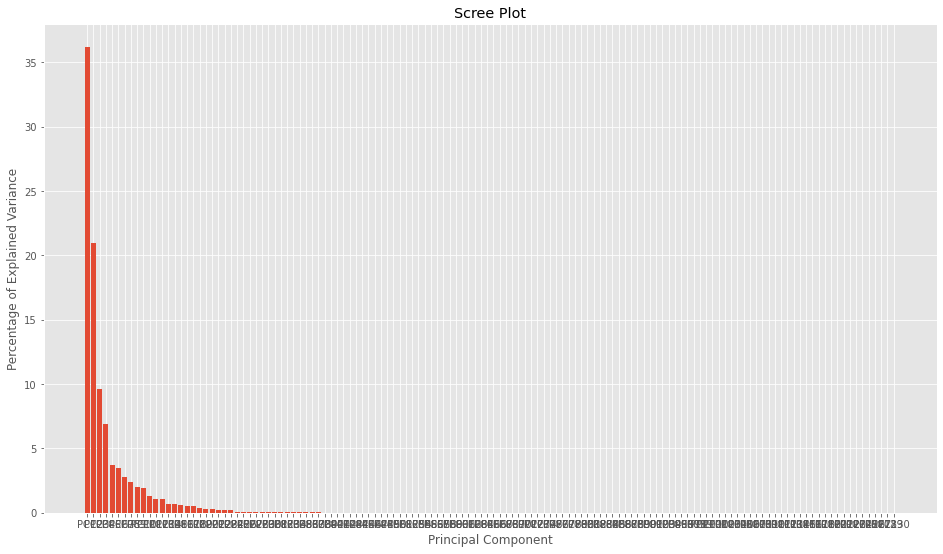

In [572]:
plt.bar(x=range(1, len(per_var_alldataset) + 1 ), height = per_var_alldataset, tick_label = labels_alldataset)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [573]:
#Ojo, se cambió de posición (transposición), por eso pareciera que ambos (index y columns) llevaran lo mismo pero NO. El index lleva las instancias.
pca_df_alldataset_alldataset = pd.DataFrame(pca_data_alldataset, index = alldataset_dataset_10_10inst.columns , columns = labels_alldataset)

In [574]:
# Loading scores for PC1

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[0], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC1_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC1_df_alldataset = PC1_loading_scores_alldataset.to_frame()
PC1_df_alldataset = PC1_df_alldataset.rename(columns={0: 'Col_1'})
PC1_df_alldataset.reset_index(level=0, inplace=True)


# Loading scores for PC2


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[1], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values


PC2_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC2_df_alldataset = PC2_loading_scores_alldataset.to_frame()
PC2_df_alldataset = PC2_df_alldataset.rename(columns={0: 'Col_1'})
PC2_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC3


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[2], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values
PC3_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC3_df_alldataset = PC3_loading_scores_alldataset.to_frame()
PC3_df_alldataset = PC3_df_alldataset.rename(columns={0: 'Col_1'})
PC3_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC4


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[3], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC4_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC4_df_alldataset = PC4_loading_scores_alldataset.to_frame()
PC4_df_alldataset = PC4_df_alldataset.rename(columns={0: 'Col_1'})
PC4_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC5


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[4], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)
top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC5_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC5_df_alldataset = PC5_loading_scores_alldataset.to_frame()
PC5_df_alldataset = PC5_df_alldataset.rename(columns={0: 'Col_1'})
PC5_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC6


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[5], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC6_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC6_df_alldataset = PC6_loading_scores_alldataset.to_frame()
PC6_df_alldataset = PC6_df_alldataset.rename(columns={0: 'Col_1'})
PC6_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC7


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[6], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC7_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC7_df_alldataset = PC7_loading_scores_alldataset.to_frame()
PC7_df_alldataset = PC7_df_alldataset.rename(columns={0: 'Col_1'})
PC7_df_alldataset.reset_index(level=0, inplace=True)


# Loading scores for PC8


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[7], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC8_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC8_df_alldataset = PC8_loading_scores_alldataset.to_frame()
PC8_df_alldataset = PC8_df_alldataset.rename(columns={0: 'Col_1'})
PC8_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC9

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[8], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC9_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC9_df_alldataset = PC9_loading_scores_alldataset.to_frame()
PC9_df_alldataset = PC9_df_alldataset.rename(columns={0: 'Col_1'})

PC9_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC10

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[9], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC10_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC10_df_alldataset = PC10_loading_scores_alldataset.to_frame()
PC10_df_alldataset = PC10_df_alldataset.rename(columns={0: 'Col_1'})
PC10_df_alldataset.reset_index(level=0, inplace=True)



In [575]:
###########

#calcular qué feature se repite más

PCA_10components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset).append(PC7_df_alldataset).append(PC8_df_alldataset).append(PC9_df_alldataset).append(PC10_df_alldataset)

dic = {}
for i in range(100):
    x = list(PCA_10components_alldataset.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1

dic

{'feature_330': 1,
 'feature_353': 1,
 'feature_307': 1,
 'feature_376': 1,
 'feature_284': 1,
 'feature_261': 1,
 'feature_399': 1,
 'feature_238': 1,
 'feature_332': 1,
 'feature_310': 1,
 'feature_116': 1,
 'feature_119': 1,
 'feature_120': 1,
 'feature_93': 1,
 'feature_117': 1,
 'feature_118': 1,
 'feature_121': 1,
 'feature_96': 1,
 'feature_97': 1,
 'feature_95': 1,
 'feature_114': 1,
 'feature_137': 1,
 'feature_91': 1,
 'feature_160': 1,
 'feature_135': 1,
 'feature_158': 1,
 'feature_112': 1,
 'feature_110': 1,
 'feature_133': 1,
 'feature_89': 1,
 'feature_315': 1,
 'feature_338': 1,
 'feature_361': 1,
 'feature_344': 1,
 'feature_321': 1,
 'feature_317': 1,
 'feature_340': 1,
 'feature_319': 1,
 'feature_342': 1,
 'feature_292': 1,
 'feature_38': 1,
 'feature_15': 1,
 'feature_40': 1,
 'feature_44': 1,
 'feature_17': 1,
 'feature_42': 1,
 'feature_21': 1,
 'feature_19': 1,
 'feature_61': 1,
 'feature_63': 1,
 'feature_106': 3,
 'feature_129': 3,
 'feature_152': 3,
 'feature

In [576]:
##############################
  #HOW TO CALCULATE WITH PCA ( 10 components )
#############################
	
projection_alldataset = pca_alldataset.transform(X=new_alldataset_dataset_10_10inst)
projection_alldataset = pd.DataFrame(
    projection_alldataset,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60','PC61','PC62','PC63','PC64','PC65','PC66','PC67','PC68','PC69','PC70','PC71','PC72','PC73','PC74','PC75','PC76','PC77','PC78','PC79','PC80','PC81','PC82','PC83','PC84','PC85','PC86','PC87','PC88','PC89','PC90','PC91','PC92','PC93','PC94','PC95','PC96','PC97','PC98','PC99','PC100','PC101','PC102','PC103','PC104','PC105','PC106','PC107','PC108','PC109','PC110','PC111','PC112','PC113','PC114','PC115','PC116','PC117','PC118','PC119','PC120','PC121','PC122','PC123','PC124','PC125','PC126','PC127','PC128','PC129','PC130'
    ],
    index   = new_alldataset_dataset_10_10inst.index
)
projection_alldataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130
0,3.187428,-6.481000,-2.182391,5.684832,0.836077,-0.568671,-0.773782,-1.296380,-0.559148,1.497032,...,-0.039100,-0.003807,0.047250,-0.060777,-0.005638,0.047486,0.047817,0.057059,-0.037258,-0.024454
1,5.007509,-6.071155,-2.137322,5.535735,1.094969,0.768258,-0.911493,-2.070965,-1.048286,2.056303,...,-0.066111,-0.035288,0.053783,-0.066501,-0.014064,0.042948,0.048577,0.048436,-0.077914,-0.024202
2,2.863300,-6.517828,-1.925490,5.325381,0.612177,-0.767692,-0.831593,-0.999874,-0.591246,1.502271,...,-0.027921,-0.007940,0.045941,-0.046815,0.006387,0.030888,0.040567,0.042112,-0.043077,-0.029686
3,3.583843,-6.587691,-1.558633,4.339123,1.091446,-0.578746,-0.250063,-1.301685,-0.657125,1.588382,...,-0.070560,-0.002431,0.049640,-0.055996,-0.014537,0.022788,0.026271,0.038831,-0.040108,-0.030924
4,5.114333,-6.071584,-2.065300,5.301975,1.169949,0.523962,-0.628816,-1.940430,-0.774462,2.028553,...,-0.061435,-0.027213,0.038520,-0.059674,-0.013214,0.044375,0.047222,0.044754,-0.072947,-0.027470


In [577]:
PC10_10_10inst_alldataset = projection_alldataset.iloc[:,0:10]
PC10_10_10inst_alldataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,3.187428,-6.481000,-2.182391,5.684832,0.836077,-0.568671,-0.773782,-1.296380,-0.559148,1.497032
1,5.007509,-6.071155,-2.137322,5.535735,1.094969,0.768258,-0.911493,-2.070965,-1.048286,2.056303
2,2.863300,-6.517828,-1.925490,5.325381,0.612177,-0.767692,-0.831593,-0.999874,-0.591246,1.502271
3,3.583843,-6.587691,-1.558633,4.339123,1.091446,-0.578746,-0.250063,-1.301685,-0.657125,1.588382
4,5.114333,-6.071584,-2.065300,5.301975,1.169949,0.523962,-0.628816,-1.940430,-0.774462,2.028553


In [578]:

PC10_10_10inst_alldataset.insert(0,"instance",['aprender_175', 'aprender_18', 'aprender_195', 'aprender_217',
       'aprender_27', 'aprender_282', 'aprender_34', 'aprender_35',
       'aprender_7', 'aprender__466', 'bien_174', 'bien_230', 'bien_241',
       'bien_288', 'bien_295', 'bien_337', 'bien_39', 'bien_416',
       'bien_561', 'bien_626', 'comer_144', 'comer_164', 'comer_248',
       'comer_313', 'comer_412', 'comer_422', 'comer_475', 'comer_625',
       'comer_712', 'comer_747', 'cuánto_405', 'cuánto_420', 'cuánto_445',
       'cuánto_448', 'cuánto_456', 'cuánto_460', 'cuánto_468',
       'cuánto_483', 'cuánto_703', 'cuánto_742', 'cómo_12', 'cómo_171',
       'cómo_223', 'cómo_230', 'cómo_379', 'cómo_427', 'cómo_44',
       'cómo_85', 'cómo_9', 'cómo_90', 'dentro_241', 'dentro_369',
       'dentro_457', 'dentro_532', 'dentro_55', 'dentro_627',
       'dentro_647', 'dentro_664', 'dentro_692', 'dentro_73',
       'emoción_143', 'emoción_145', 'emoción_188', 'emoción_249',
       'emoción_250', 'emoción_286', 'emoción_43', 'emoción_54',
       'emoción_71', 'emoción_93', 'fuerte_153', 'fuerte_310',
       'fuerte_314', 'fuerte_361', 'fuerte_362', 'fuerte_363',
       'fuerte_372', 'fuerte_459', 'fuerte_571', 'fuerte_588',
       'pensar_235', 'pensar_450', 'pensar_461', 'pensar_600',
       'pensar_613', 'pensar_623', 'pensar_640', 'pensar_66',
       'pensar_771', 'pensar_97', 'sentir_14', 'sentir_149', 'sentir_16',
       'sentir_38', 'sentir_458', 'sentir_53', 'sentir_547', 'sentir_602',
       'sentir_604', 'sentir_89', 'sí_159', 'sí_194', 'sí_200', 'sí_278',
       'sí_291', 'sí_306', 'sí_359', 'sí_419', 'sí_633', 'sí_659',
       'tú_205', 'tú_207', 'tú_229', 'tú_247', 'tú_277', 'tú_635',
       'tú_691', 'tú_80', 'tú_803', 'tú_96', 'yo_113', 'yo_119', 'yo_121',
       'yo_125', 'yo_140', 'yo_152', 'yo_164', 'yo_235', 'yo_237', 'yo_3'],True)

In [579]:
PC10_10_10inst_alldataset['classes'] = PC10_10_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [580]:
PC10_10_10inst_alldataset.drop("instance", axis=1, inplace=True)

PC10_10_10inst_alldataset.head()

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,classes
0,3.187428,-6.481000,-2.182391,5.684832,0.836077,-0.568671,-0.773782,-1.296380,-0.559148,1.497032,aprender
1,5.007509,-6.071155,-2.137322,5.535735,1.094969,0.768258,-0.911493,-2.070965,-1.048286,2.056303,aprender
2,2.863300,-6.517828,-1.925490,5.325381,0.612177,-0.767692,-0.831593,-0.999874,-0.591246,1.502271,aprender
3,3.583843,-6.587691,-1.558633,4.339123,1.091446,-0.578746,-0.250063,-1.301685,-0.657125,1.588382,aprender
4,5.114333,-6.071584,-2.065300,5.301975,1.169949,0.523962,-0.628816,-1.940430,-0.774462,2.028553,aprender


In [581]:
print(pd.unique(PC10_10_10inst_alldataset['classes']))

X_PC10_10_10inst_alldataset= PC10_10_10inst_alldataset.iloc[:,:-1].values
y_PC10_10_10inst_alldataset=  PC10_10_10inst_alldataset.iloc[:,-1].values

['aprender' 'bien' 'comer' 'cuánto' 'cómo' 'dentro' 'emoción' 'fuerte'
 'pensar' 'sentir' 'sí' 'tú' 'yo']


In [582]:
Labelencoder_Y = LabelEncoder()
y_PC10_10_10inst_alldataset== Labelencoder_Y.fit_transform(y_PC10_10_10inst_alldataset)
y_PC10_10_10inst_alldataset

array(['aprender', 'aprender', 'aprender', 'aprender', 'aprender',
       'aprender', 'aprender', 'aprender', 'aprender', 'aprender', 'bien',
       'bien', 'bien', 'bien', 'bien', 'bien', 'bien', 'bien', 'bien',
       'bien', 'comer', 'comer', 'comer', 'comer', 'comer', 'comer',
       'comer', 'comer', 'comer', 'comer', 'cuánto', 'cuánto', 'cuánto',
       'cuánto', 'cuánto', 'cuánto', 'cuánto', 'cuánto', 'cuánto',
       'cuánto', 'cómo', 'cómo', 'cómo', 'cómo', 'cómo', 'cómo', 'cómo',
       'cómo', 'cómo', 'cómo', 'dentro', 'dentro', 'dentro', 'dentro',
       'dentro', 'dentro', 'dentro', 'dentro', 'dentro', 'dentro',
       'emoción', 'emoción', 'emoción', 'emoción', 'emoción', 'emoción',
       'emoción', 'emoción', 'emoción', 'emoción', 'fuerte', 'fuerte',
       'fuerte', 'fuerte', 'fuerte', 'fuerte', 'fuerte', 'fuerte',
       'fuerte', 'fuerte', 'pensar', 'pensar', 'pensar', 'pensar',
       'pensar', 'pensar', 'pensar', 'pensar', 'pensar', 'pensar',
       'sentir', 'sent

In [583]:

X_train_PC10_10_10inst_alldataset, X_test_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset = train_test_split(X_PC10_10_10inst_alldataset, y_PC10_10_10inst_alldataset, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC10_10_10inst_alldataset = scaler.fit_transform(X_train_PC10_10_10inst_alldataset)
X_test_PC10_10_10inst_alldataset = scaler.transform(X_test_PC10_10_10inst_alldataset)

([<matplotlib.axis.XTick at 0x2529d4fe2c8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

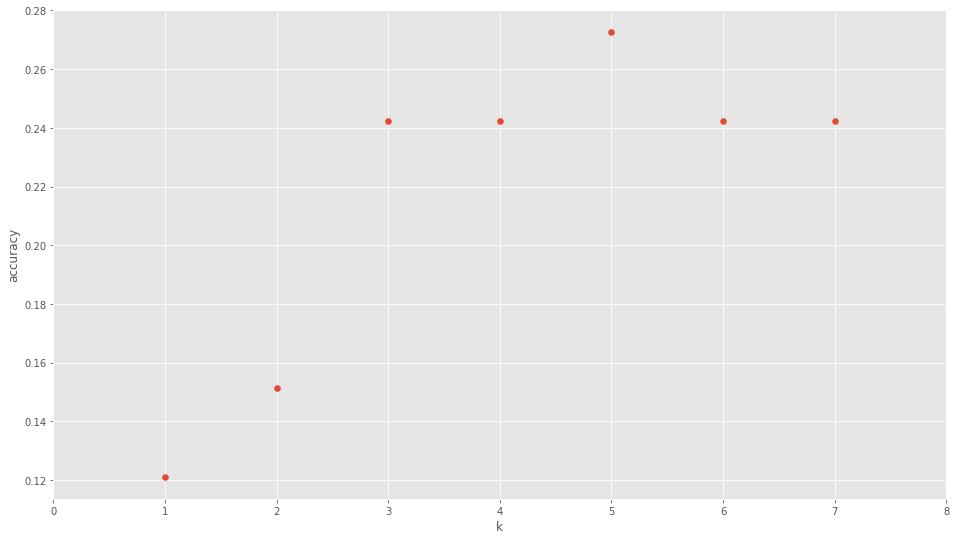

In [584]:
k_range_PC10_10_10inst_alldataset = range(1, 8)
scores_PC10_10_10inst_alldataset = []
for k in k_range_PC10_10_10inst_alldataset:
    knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors = k)
    knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
    scores_PC10_10_10inst_alldataset.append(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC10_10_10inst_alldataset, scores_PC10_10_10inst_alldataset)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.12


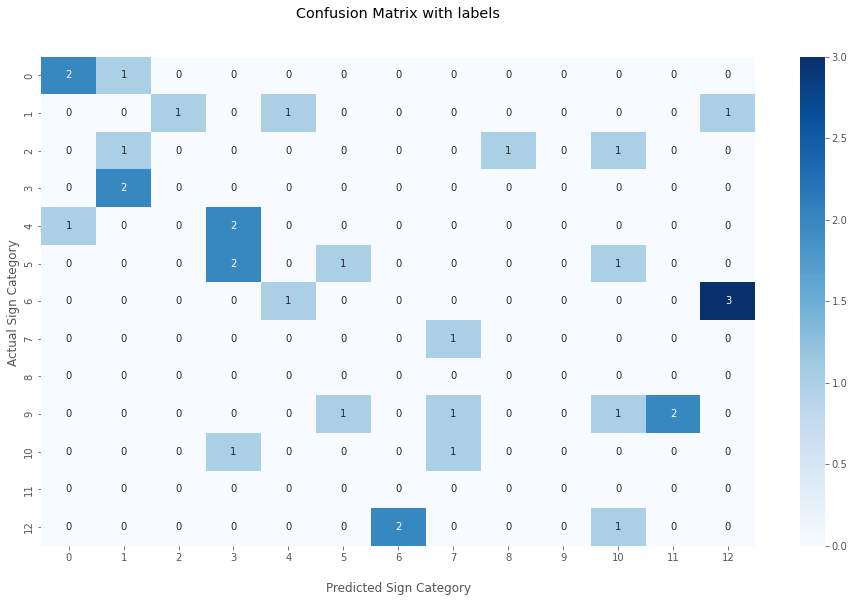

In [585]:
n_neighbors_PC10_10_10inst_alldataset = 1
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.63
Accuracy of K-NN classifier on test set: 0.15


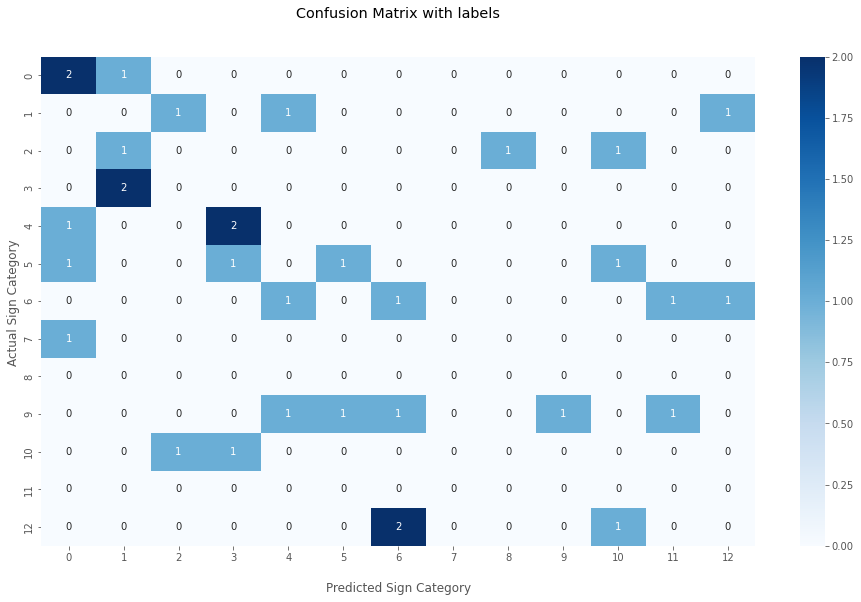

In [586]:
n_neighbors_PC10_10_10inst_alldataset = 2
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.60
Accuracy of K-NN classifier on test set: 0.24


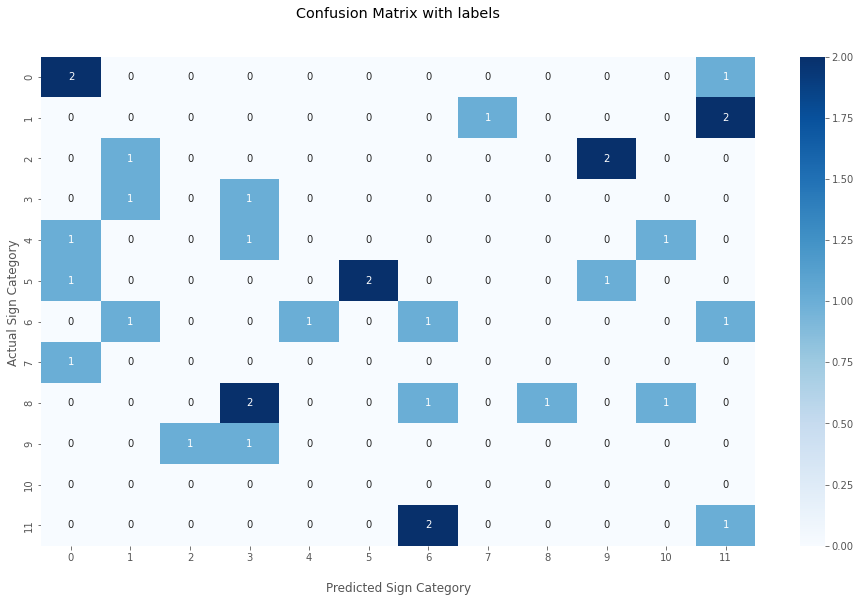

In [587]:
n_neighbors_PC10_10_10inst_alldataset = 3
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.61
Accuracy of K-NN classifier on test set: 0.27


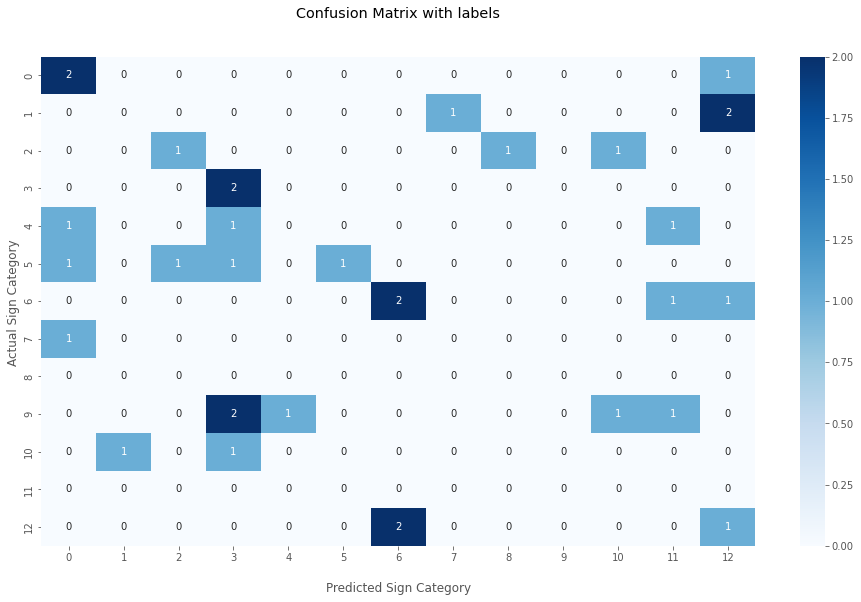

In [588]:
n_neighbors_PC10_10_10inst_alldataset = 5
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [589]:
##############################
  #HOW TO CALCULATE WITH PCA ( 6 components )
#############################

projection_alldataset = pca_alldataset.transform(X=new_alldataset_dataset_10_10inst)
projection_alldataset = pd.DataFrame(
    projection_alldataset,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40', 'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60','PC61','PC62','PC63','PC64','PC65','PC66','PC67','PC68','PC69','PC70','PC71','PC72','PC73','PC74','PC75','PC76','PC77','PC78','PC79','PC80','PC81','PC82','PC83','PC84','PC85','PC86','PC87','PC88','PC89','PC90','PC91','PC92','PC93','PC94','PC95','PC96','PC97','PC98','PC99','PC100','PC101','PC102','PC103','PC104','PC105','PC106','PC107','PC108','PC109','PC110','PC111','PC112','PC113','PC114','PC115','PC116','PC117','PC118','PC119','PC120','PC121','PC122','PC123','PC124','PC125','PC126','PC127','PC128','PC129','PC130'],
    index   = new_alldataset_dataset_10_10inst.index
)
projection_alldataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130
0,3.187428,-6.481000,-2.182391,5.684832,0.836077,-0.568671,-0.773782,-1.296380,-0.559148,1.497032,...,-0.039100,-0.003807,0.047250,-0.060777,-0.005638,0.047486,0.047817,0.057059,-0.037258,-0.024454
1,5.007509,-6.071155,-2.137322,5.535735,1.094969,0.768258,-0.911493,-2.070965,-1.048286,2.056303,...,-0.066111,-0.035288,0.053783,-0.066501,-0.014064,0.042948,0.048577,0.048436,-0.077914,-0.024202
2,2.863300,-6.517828,-1.925490,5.325381,0.612177,-0.767692,-0.831593,-0.999874,-0.591246,1.502271,...,-0.027921,-0.007940,0.045941,-0.046815,0.006387,0.030888,0.040567,0.042112,-0.043077,-0.029686
3,3.583843,-6.587691,-1.558633,4.339123,1.091446,-0.578746,-0.250063,-1.301685,-0.657125,1.588382,...,-0.070560,-0.002431,0.049640,-0.055996,-0.014537,0.022788,0.026271,0.038831,-0.040108,-0.030924
4,5.114333,-6.071584,-2.065300,5.301975,1.169949,0.523962,-0.628816,-1.940430,-0.774462,2.028553,...,-0.061435,-0.027213,0.038520,-0.059674,-0.013214,0.044375,0.047222,0.044754,-0.072947,-0.027470


In [590]:
PC6_10_10inst_alldataset = projection_alldataset.iloc[:,0:6]
PC6_10_10inst_alldataset.head()

PC6_10_10inst_alldataset.insert(0,"instance",['aprender_175', 'aprender_18', 'aprender_195', 'aprender_217',
       'aprender_27', 'aprender_282', 'aprender_34', 'aprender_35',
       'aprender_7', 'aprender__466', 'bien_174', 'bien_230', 'bien_241',
       'bien_288', 'bien_295', 'bien_337', 'bien_39', 'bien_416',
       'bien_561', 'bien_626', 'comer_144', 'comer_164', 'comer_248',
       'comer_313', 'comer_412', 'comer_422', 'comer_475', 'comer_625',
       'comer_712', 'comer_747', 'cuánto_405', 'cuánto_420', 'cuánto_445',
       'cuánto_448', 'cuánto_456', 'cuánto_460', 'cuánto_468',
       'cuánto_483', 'cuánto_703', 'cuánto_742', 'cómo_12', 'cómo_171',
       'cómo_223', 'cómo_230', 'cómo_379', 'cómo_427', 'cómo_44',
       'cómo_85', 'cómo_9', 'cómo_90', 'dentro_241', 'dentro_369',
       'dentro_457', 'dentro_532', 'dentro_55', 'dentro_627',
       'dentro_647', 'dentro_664', 'dentro_692', 'dentro_73',
       'emoción_143', 'emoción_145', 'emoción_188', 'emoción_249',
       'emoción_250', 'emoción_286', 'emoción_43', 'emoción_54',
       'emoción_71', 'emoción_93', 'fuerte_153', 'fuerte_310',
       'fuerte_314', 'fuerte_361', 'fuerte_362', 'fuerte_363',
       'fuerte_372', 'fuerte_459', 'fuerte_571', 'fuerte_588',
       'pensar_235', 'pensar_450', 'pensar_461', 'pensar_600',
       'pensar_613', 'pensar_623', 'pensar_640', 'pensar_66',
       'pensar_771', 'pensar_97', 'sentir_14', 'sentir_149', 'sentir_16',
       'sentir_38', 'sentir_458', 'sentir_53', 'sentir_547', 'sentir_602',
       'sentir_604', 'sentir_89', 'sí_159', 'sí_194', 'sí_200', 'sí_278',
       'sí_291', 'sí_306', 'sí_359', 'sí_419', 'sí_633', 'sí_659',
       'tú_205', 'tú_207', 'tú_229', 'tú_247', 'tú_277', 'tú_635',
       'tú_691', 'tú_80', 'tú_803', 'tú_96', 'yo_113', 'yo_119', 'yo_121',
       'yo_125', 'yo_140', 'yo_152', 'yo_164', 'yo_235', 'yo_237', 'yo_3'],True)

In [591]:
PC6_10_10inst_alldataset['classes'] = PC6_10_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [592]:
PC6_10_10inst_alldataset.drop("instance", axis=1, inplace=True)

PC6_10_10inst_alldataset.head()

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PC1,PC2,PC3,PC4,PC5,PC6,classes
0,3.187428,-6.481000,-2.182391,5.684832,0.836077,-0.568671,aprender
1,5.007509,-6.071155,-2.137322,5.535735,1.094969,0.768258,aprender
2,2.863300,-6.517828,-1.925490,5.325381,0.612177,-0.767692,aprender
3,3.583843,-6.587691,-1.558633,4.339123,1.091446,-0.578746,aprender
4,5.114333,-6.071584,-2.065300,5.301975,1.169949,0.523962,aprender


In [593]:
print(pd.unique(PC6_10_10inst_alldataset['classes']))

X_PC6_10_10inst_alldataset= PC6_10_10inst_alldataset.iloc[:,:-1].values
y_PC6_10_10inst_alldataset=  PC6_10_10inst_alldataset.iloc[:,-1].values

['aprender' 'bien' 'comer' 'cuánto' 'cómo' 'dentro' 'emoción' 'fuerte'
 'pensar' 'sentir' 'sí' 'tú' 'yo']


In [594]:
Labelencoder_Y = LabelEncoder()
y_PC6_10_10inst_alldataset== Labelencoder_Y.fit_transform(y_PC6_10_10inst_alldataset)
y_PC6_10_10inst_alldataset

array(['aprender', 'aprender', 'aprender', 'aprender', 'aprender',
       'aprender', 'aprender', 'aprender', 'aprender', 'aprender', 'bien',
       'bien', 'bien', 'bien', 'bien', 'bien', 'bien', 'bien', 'bien',
       'bien', 'comer', 'comer', 'comer', 'comer', 'comer', 'comer',
       'comer', 'comer', 'comer', 'comer', 'cuánto', 'cuánto', 'cuánto',
       'cuánto', 'cuánto', 'cuánto', 'cuánto', 'cuánto', 'cuánto',
       'cuánto', 'cómo', 'cómo', 'cómo', 'cómo', 'cómo', 'cómo', 'cómo',
       'cómo', 'cómo', 'cómo', 'dentro', 'dentro', 'dentro', 'dentro',
       'dentro', 'dentro', 'dentro', 'dentro', 'dentro', 'dentro',
       'emoción', 'emoción', 'emoción', 'emoción', 'emoción', 'emoción',
       'emoción', 'emoción', 'emoción', 'emoción', 'fuerte', 'fuerte',
       'fuerte', 'fuerte', 'fuerte', 'fuerte', 'fuerte', 'fuerte',
       'fuerte', 'fuerte', 'pensar', 'pensar', 'pensar', 'pensar',
       'pensar', 'pensar', 'pensar', 'pensar', 'pensar', 'pensar',
       'sentir', 'sent

In [595]:
X_train_PC6_10_10inst_alldataset, X_test_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset = train_test_split(X_PC6_10_10inst_alldataset, y_PC6_10_10inst_alldataset, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC6_10_10inst_alldataset = scaler.fit_transform(X_train_PC6_10_10inst_alldataset)
X_test_PC6_10_10inst_alldataset = scaler.transform(X_test_PC6_10_10inst_alldataset)

([<matplotlib.axis.XTick at 0x2529ec14948>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

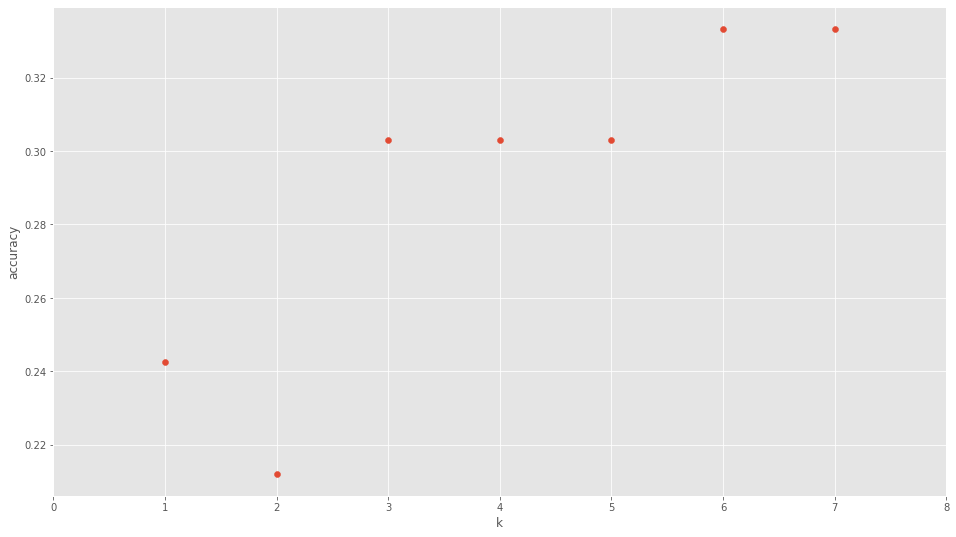

In [596]:
k_range_PC6_10_10inst_alldataset = range(1, 8)
scores_PC6_10_10inst_alldataset = []
for k in k_range_PC6_10_10inst_alldataset:
    knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors = k)
    knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
    scores_PC6_10_10inst_alldataset.append(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC6_10_10inst_alldataset, scores_PC6_10_10inst_alldataset)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.24


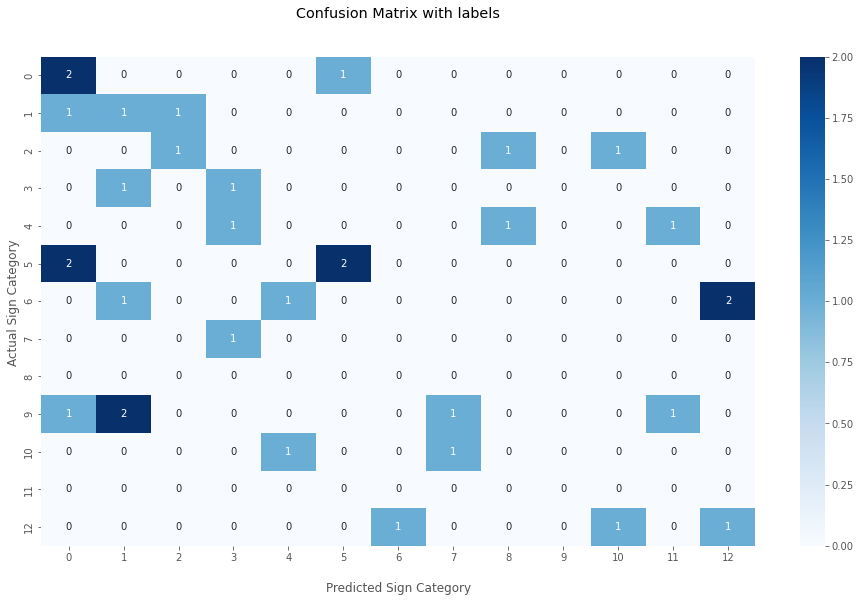

In [597]:
n_neighbors_PC6_10_10inst_alldataset = 1
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.59
Accuracy of K-NN classifier on test set: 0.21


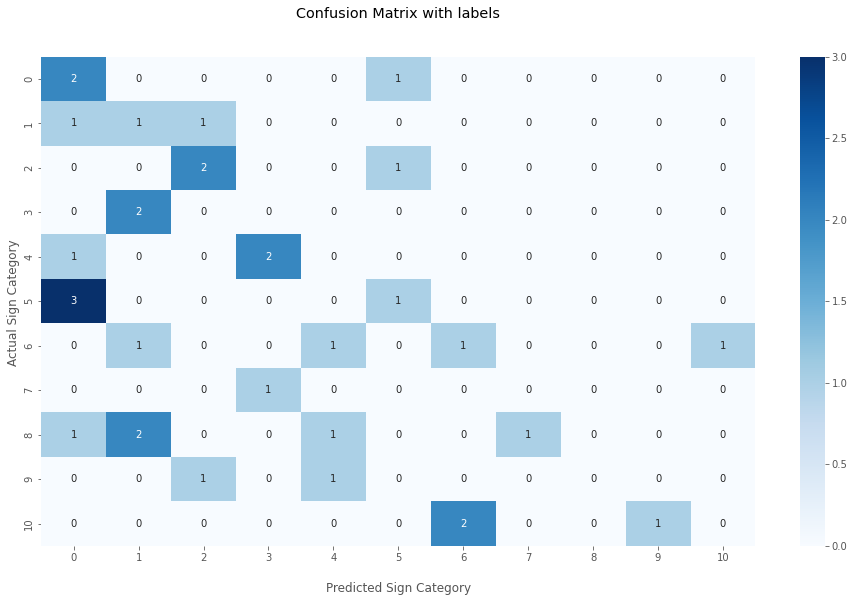

In [598]:
n_neighbors_PC6_10_10inst_alldataset = 2
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.53
Accuracy of K-NN classifier on test set: 0.30


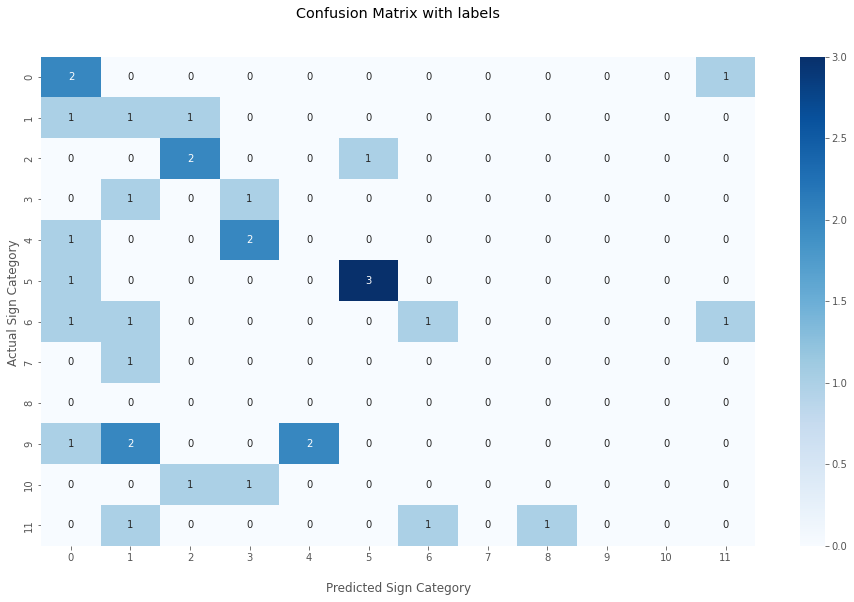

In [599]:
n_neighbors_PC6_10_10inst_alldataset = 3
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.46
Accuracy of K-NN classifier on test set: 0.30


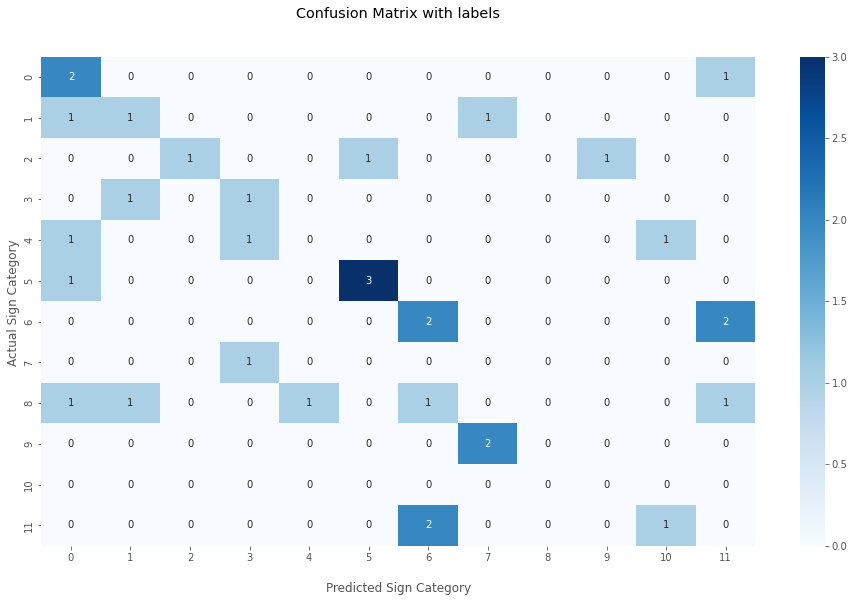

In [600]:
n_neighbors_PC6_10_10inst_alldataset = 5
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [601]:
PCA_6components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset)

dic = {}
for i in range(60):
    x = list(PCA_6components_alldataset.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1
		
dic

{'feature_330': 1,
 'feature_353': 1,
 'feature_307': 1,
 'feature_376': 1,
 'feature_284': 1,
 'feature_261': 1,
 'feature_399': 1,
 'feature_238': 1,
 'feature_332': 1,
 'feature_310': 1,
 'feature_116': 1,
 'feature_119': 1,
 'feature_120': 1,
 'feature_93': 1,
 'feature_117': 1,
 'feature_118': 1,
 'feature_121': 1,
 'feature_96': 1,
 'feature_97': 1,
 'feature_95': 1,
 'feature_114': 1,
 'feature_137': 1,
 'feature_91': 1,
 'feature_160': 1,
 'feature_135': 1,
 'feature_158': 1,
 'feature_112': 1,
 'feature_110': 1,
 'feature_133': 1,
 'feature_89': 1,
 'feature_315': 1,
 'feature_338': 1,
 'feature_361': 1,
 'feature_344': 1,
 'feature_321': 1,
 'feature_317': 1,
 'feature_340': 1,
 'feature_319': 1,
 'feature_342': 1,
 'feature_292': 1,
 'feature_38': 1,
 'feature_15': 1,
 'feature_40': 1,
 'feature_44': 1,
 'feature_17': 1,
 'feature_42': 1,
 'feature_21': 1,
 'feature_19': 1,
 'feature_61': 1,
 'feature_63': 1,
 'feature_106': 1,
 'feature_129': 1,
 'feature_152': 1,
 'feature